In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [215]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [216]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [217]:
### Your code is here

df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [218]:
df.shape

(131662, 13)

In [219]:
df.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [220]:
data['Var1'] = data['Var1'].astype(np.float64)
data['Var2'] = data['Var2'].astype(np.float64)
data['Var3'] = data['Var3'].astype(np.float64)

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131662 entries, T0005689460 to T0005908514
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  131662 non-null  object 
 2   Customer_Since_Months        131662 non-null  float64
 3   Life_Style_Index             131662 non-null  float64
 4   Confidence_Life_Style_Index  131662 non-null  object 
 5   Destination_Type             131662 non-null  object 
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         131662 non-null  float64
 9   Var2                         131662 non-null  float64
 10  Var3                         131662 non-null  float64
 11  Gender                       131662 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  in

In [222]:
numeric_column = df.loc[:, df.dtypes!=np.object].columns
categorial_column = df.loc[:, df.dtypes==np.object].columns

In [223]:
numeric_column

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [224]:
df[numeric_column] = df[numeric_column].fillna(df[numeric_column].mean())
df[numeric_column].isna().sum()

Trip_Distance               0
Customer_Since_Months       0
Life_Style_Index            0
Customer_Rating             0
Cancellation_Last_1Month    0
Var1                        0
Var2                        0
Var3                        0
Surge_Pricing_Type          0
dtype: int64

In [225]:
for cat_col in categorial_column:
    most_pop_cat = df.groupby(cat_col)[cat_col].count().sort_values(ascending=False).index[0]
    df[cat_col] = df[cat_col].fillna(most_pop_cat)
df[categorial_column].isna().sum()

Type_of_Cab                    0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
dtype: int64

<AxesSubplot:>

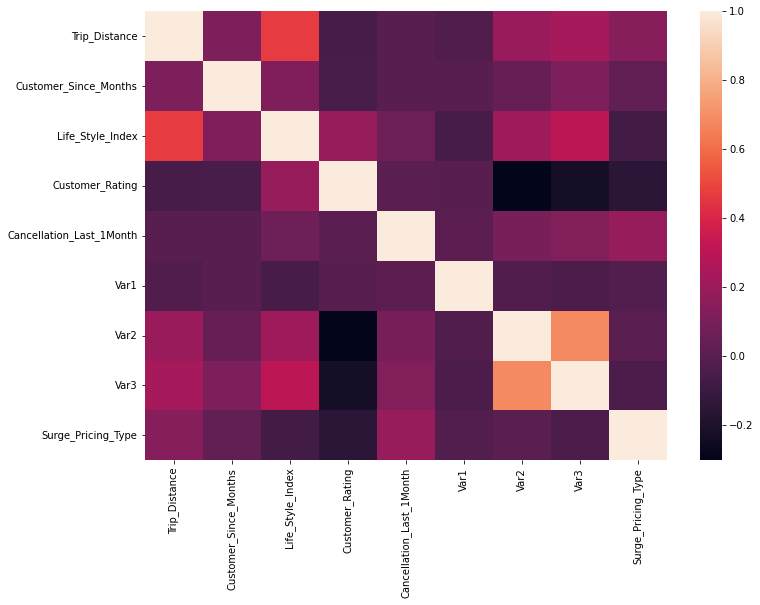

In [226]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.heatmap(df[numeric_column].corr())

In [227]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_column], 5))

Top Absolute Correlations
Var2              Var3                0.683437
Trip_Distance     Life_Style_Index    0.468367
Life_Style_Index  Var3                0.303296
Customer_Rating   Var2                0.302968
Trip_Distance     Var3                0.231706
dtype: float64


In [228]:
df[categorial_column].nunique()

Type_of_Cab                     5
Confidence_Life_Style_Index     3
Destination_Type               14
Gender                          2
dtype: int64

In [229]:
ohe = pd.get_dummies(df[categorial_column], drop_first=True)
df = pd.concat([df, ohe], axis=1).drop(categorial_column, axis=1)

In [231]:
df.shape

(131662, 29)

In [67]:
"""
EDA

Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. 
Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, 
примените One-Hot-Encoding для них. Не забудьте в методе pd.get_dummies указать параметр drop_first=True.
"""

'\nEDA\n\nЗаполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. \nИзобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.\n\nТак как в сумме уникальных значений различных категориальных признаков окажется не супер-много, \nпримените One-Hot-Encoding для них. Не забудьте в методе pd.get_dummies указать параметр drop_first=True.\n'

### Training

In [232]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [363]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [321]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier  

logit = LogisticRegression()
pipe_one_rest = Pipeline([('scaler', StandardScaler()),
                  ('one_vs_rest', OneVsRestClassifier(logit))])

In [322]:
pipe_one_rest.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_rest',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [323]:
print(pipe_one_rest.classes_)

print(pipe_one_rest.predict(X_test.head(1)))

print(pipe_one_rest.decision_function(X_test.head(1)))

print(pipe_one_rest.predict_proba(X_test.head(1)))

[1 2 3]
[3]
[[-0.8459469  -1.00097568 -0.56158415]]
[[0.32211879 0.28829166 0.38958955]]


In [324]:
np.mean(pipe_one_rest.predict(X_test)==y_test), np.mean(pipe_one_rest.predict(X_train)==y_train)

(0.6787680856719706, 0.679300097788833)

In [325]:
from sklearn.metrics import classification_report
target_names = ['class_0', 'class_1', 'class_2']
scores_str = classification_report(pipe_one_rest.predict(X_test), y_test, digits=3)
print(scores_str)

              precision    recall  f1-score   support

           1      0.542     0.722     0.619      4027
           2      0.835     0.636     0.722     14900
           3      0.571     0.741     0.645      7406

    accuracy                          0.679     26333
   macro avg      0.649     0.700     0.662     26333
weighted avg      0.716     0.679     0.685     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [328]:
param_grid = {'one_vs_rest__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_rest__estimator__C': [0.001, 0.01, 0.1, 1]}

In [426]:
### Your code is here
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(pipe_one_rest, param_grid)

search.fit(X, y)
pipe_one_rest.set_params(**search.best_params_)
pipe_one_rest.fit(X_train, y_train)
scores_str = classification_report(pipe_one_rest.predict(X_test), y_test, digits=3)
print(scores_str)

              precision    recall  f1-score   support

           1      0.534     0.741     0.621      3873
           2      0.839     0.635     0.723     15008
           3      0.576     0.742     0.648      7452

    accuracy                          0.681     26333
   macro avg      0.650     0.706     0.664     26333
weighted avg      0.720     0.681     0.687     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

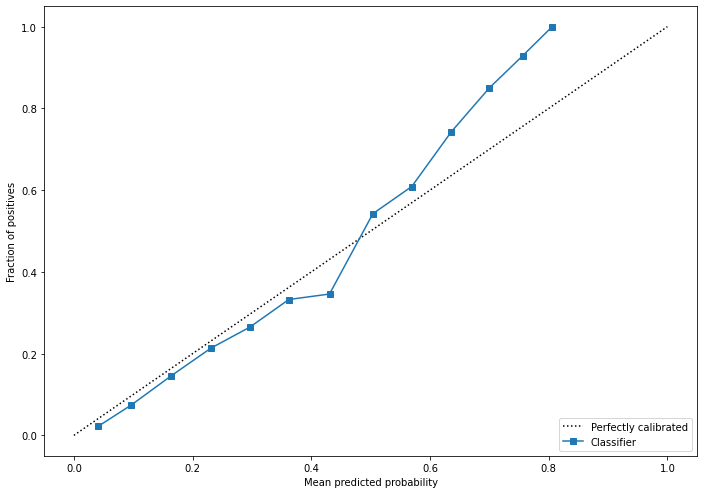

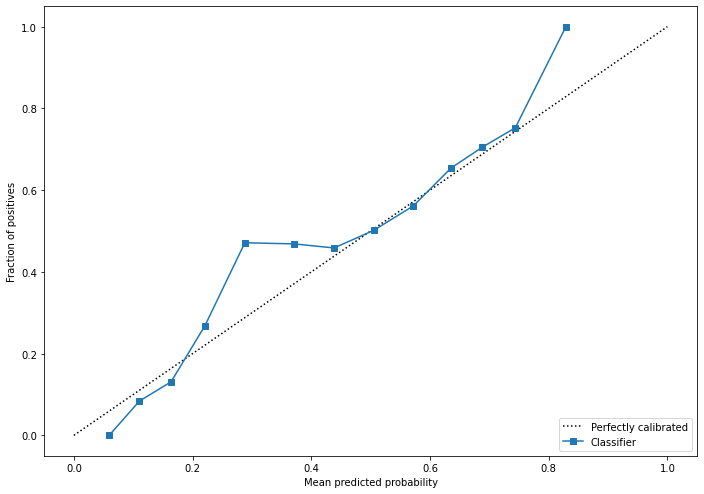

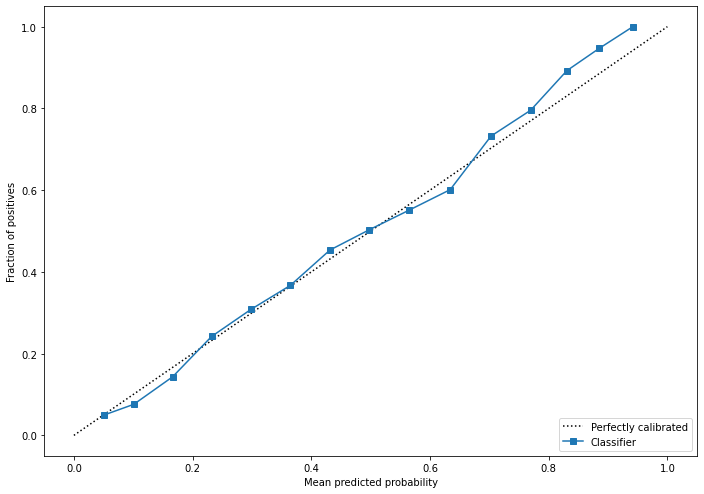

In [369]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

pred_prob = pipe_one_rest.predict_proba(X_test)
for i in range(0, 3):
    pred_prob_cls = pred_prob[:, i]
    y_test_curv = y_test.copy()
    y_test_curv.loc[y_test != i+1] = 0
    disp = CalibrationDisplay.from_predictions(y_test_curv, pred_prob_cls, n_bins=15)

**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [388]:
numeric_column = numeric_column[:-1]

In [414]:
### Создание полиномиальных признаков

X_polinomial = X.copy()

for num_col in numeric_column:
    for degree in range(2, 5):
        to_add = (X_polinomial[num_col]**degree).to_frame().rename({f"{num_col}": f"{num_col}_{degree}"}, axis=1)
        X_polinomial = pd.concat((X_polinomial, to_add), axis=1)

In [416]:
X_polinomial.shape

(131662, 52)

In [415]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [427]:
logit = LogisticRegression(penalty='l2', C=0.001)
pipe_one_rest_pol = Pipeline([('scaler', StandardScaler()),
                  ('one_vs_rest', OneVsRestClassifier(logit))])

In [429]:
pipe_one_rest.fit(X_pol_train, y_train)
scores_str = classification_report(pipe_one_rest.predict(X_pol_test), y_test, digits=3)
print(scores_str)

              precision    recall  f1-score   support

           1      0.532     0.748     0.622      3819
           2      0.837     0.636     0.723     14926
           3      0.585     0.741     0.653      7588

    accuracy                          0.683     26333
   macro avg      0.651     0.708     0.666     26333
weighted avg      0.720     0.683     0.688     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

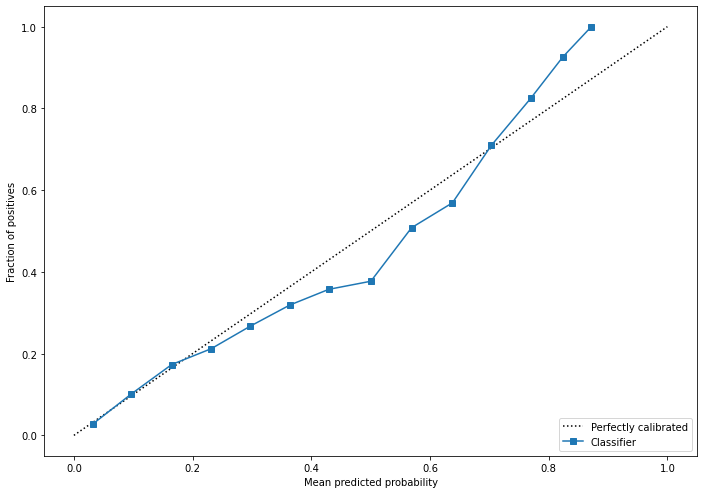

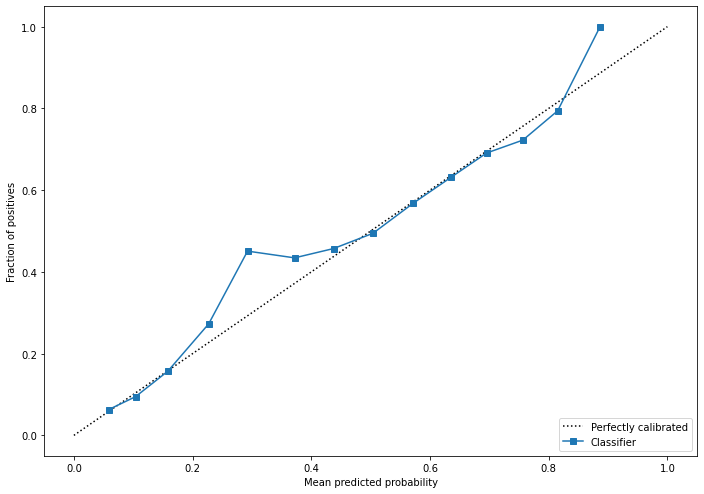

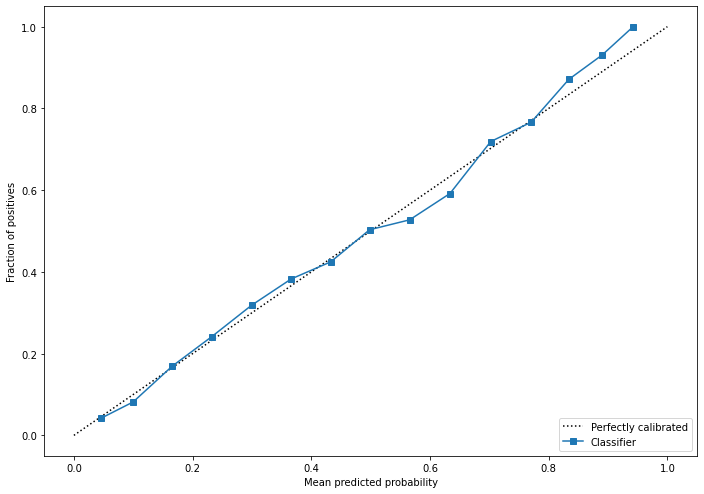

In [413]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

pred_prob_pol = pipe_one_rest_pol.predict_proba(X_pol_test)
for i in range(0, 3):
    pred_prob_cls = pred_prob_pol[:, i]
    y_test_curv_pol = y_test.copy()
    y_test_curv_pol.loc[y_test != i+1] = 0
    disp = CalibrationDisplay.from_predictions(y_test_curv_pol, pred_prob_cls, n_bins=15)

**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [430]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [437]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

pipe_one_vs_one = Pipeline([('scaler', StandardScaler()),
                            ('one_vs_one', OneVsOneClassifier(SGDClassifier()))])

Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [438]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [ ]:
### Your code is here

search = GridSearchCV(pipe_one_vs_one, param_grid)

search.fit(X, y)
pipe_one_vs_one.set_params(**search.best_params_)
print(search.best_params_)
pipe_one_vs_one.fit(X_train, y_train)
scores_str = classification_report(pipe_one_vs_one.predict(X_test), y_test, digits=3)
print(scores_str)

Можно ли однозначной сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?